# [**SVM-Anova : SVM avec sélection de caractéristique univariée**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_4_svm/plot_svm_anova.ipynb)<br/>([*SVM-Anova: SVM with univariate feature selection*](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html))

Cet exemple montre comment effectuer une sélection de caractéristiques univariées avant d'exécuter un SVC (classifieur à vecteurs de support) pour améliorer les scores de classification. Nous utilisons le jeu de données iris (4 caractéristiques) et ajoutons 36 caractéristiques non informatives. Nous pouvons constater que notre modèle atteint les meilleures performances lorsque nous sélectionnons environ 10 % des caractéristiques.

# Chargement des données avec lesquelles jouer

In [1]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

# Création du pipeline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

# Tracé du score de validation croisée en fonction du centile des fonctionnalités

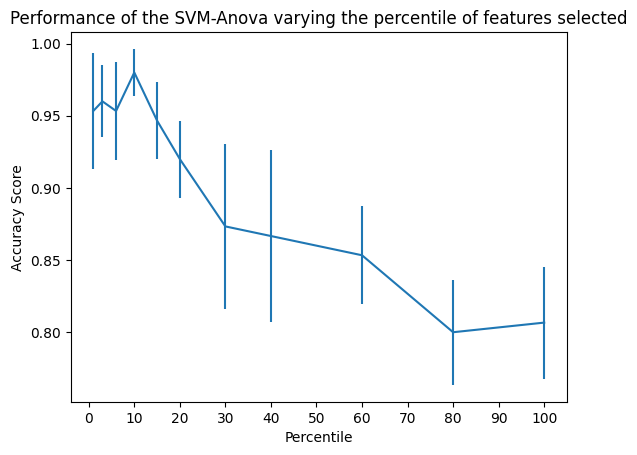

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

score_means = []
score_stds = []
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()